In [1]:
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, confusion_matrix

from scipy.stats import chi2_contingency

from preprocess import extra_features, separate
from pipelines import preprocessor, preprocessor2

In [2]:
train=pd.read_csv('Datasets/train.csv')
train=extra_features(train)
separate(train)

<IPython.core.display.Javascript object>

Target Column: ['cost_category']

Numerical Columns: ['night_mainland', 'night_zanzibar', 'total_nights']

Categorical Columns: ['age_group', 'travel_with', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'first_trip_tz', 'trip_length', 'group_size']

Text Columns: ['country', 'purpose', 'main_activity', 'info_source']


In [3]:
train.drop(columns= ['trip_length', 'group_size','total_male', 'total_female'], inplace=True)
X=train.drop('cost_category', axis=1)
X.head(2)

,country,age_group,travel_with,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,total_nights,total_people
Tour_ID,,,,,,,,,,,,,,,,,,,
tour_id1hffseyw,ITALY,45-64,With Children,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,0,7,Yes,7,2.0
tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,No,No,No,0,7,Yes,7,2.0


In [4]:
X.shape

(18506, 19)

In [5]:
X=preprocessor2(X)
X.shape

(18506, 148)

In [6]:
y= train['cost_category']
y.shape

(18506,)

In [7]:
le=LabelEncoder()
y=le.fit_transform(y).astype('int')
y

array([0, 0, 1, ..., 1, 1, 3])

In [8]:
list(le.classes_)

['High Cost',
 'Higher Cost',
 'Highest Cost',
 'Low Cost',
 'Lower Cost',
 'Normal Cost']

In [9]:
z=le.inverse_transform(y)
z

array(['High Cost', 'High Cost', 'Higher Cost', ..., 'Higher Cost',
       'Higher Cost', 'Low Cost'], dtype=object)

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from xgboost import XGBClassifier

model= XGBClassifier(n_estimators=600,
                 max_depth=8,
                 learning_rate=0.1)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.70564
[1]	validation_0-mlogloss:1.63501
[2]	validation_0-mlogloss:1.57589
[3]	validation_0-mlogloss:1.52498
[4]	validation_0-mlogloss:1.48143
[5]	validation_0-mlogloss:1.44338
[6]	validation_0-mlogloss:1.41091
[7]	validation_0-mlogloss:1.38177
[8]	validation_0-mlogloss:1.35639
[9]	validation_0-mlogloss:1.33339
[10]	validation_0-mlogloss:1.31277
[11]	validation_0-mlogloss:1.29463
[12]	validation_0-mlogloss:1.27833
[13]	validation_0-mlogloss:1.26392
[14]	validation_0-mlogloss:1.25074
[15]	validation_0-mlogloss:1.23874
[16]	validation_0-mlogloss:1.22760
[17]	validation_0-mlogloss:1.21745
[18]	validation_0-mlogloss:1.20832
[19]	validation_0-mlogloss:1.20017
[20]	validation_0-mlogloss:1.19291
[21]	validation_0-mlogloss:1.18593
[22]	validation_0-mlogloss:1.17966
[23]	validation_0-mlogloss:1.17404
[24]	validation_0-mlogloss:1.16878
[25]	validation_0-mlogloss:1.16424
[26]	validation_0-mlogloss:1.15966
[27]	validation_0-mlogloss:1.15605
[28]	validation_0-mlogloss:1.1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [19]:
y_pred=model.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.35      0.41       763
           1       0.60      0.74      0.66       955
           2       0.31      0.04      0.08        89
           3       0.25      0.04      0.08       294
           4       0.59      0.63      0.61       489
           5       0.55      0.71      0.62      1112

    accuracy                           0.56      3702
   macro avg       0.47      0.42      0.41      3702
weighted avg       0.53      0.56      0.53      3702



In [21]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[266, 259,   2,   1,   9, 226],
       [130, 707,   4,   1,   2, 111],
       [ 13,  70,   4,   0,   0,   2],
       [ 12,   9,   0,  13, 102, 158],
       [ 10,  21,   1,  11, 308, 138],
       [ 92, 106,   2,  25, 101, 786]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

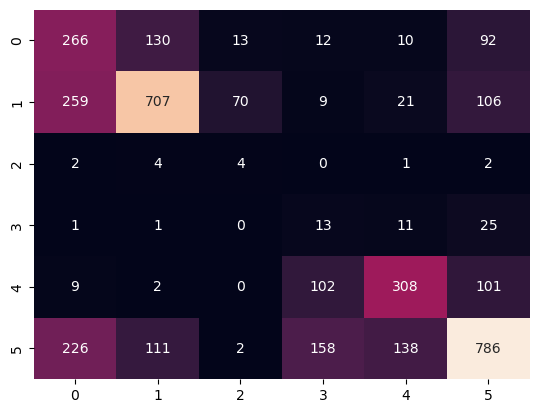

In [22]:
sns.heatmap(cm.T, annot=True, fmt='d', cbar=False)
plt.show();

In [23]:
kfold=StratifiedKFold(n_splits=10, shuffle=True)

In [24]:
for fold, (train_idx, val_idx) in enumerate(kfold.split(X,y)):
    X_train, X_test= X[train_idx], X[val_idx]
    y_train, y_test = y[train_idx], y[val_idx]

In [27]:
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=1)

[0]	validation_0-mlogloss:1.70433


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-mlogloss:1.63368
[2]	validation_0-mlogloss:1.57547
[3]	validation_0-mlogloss:1.52480
[4]	validation_0-mlogloss:1.48119
[5]	validation_0-mlogloss:1.44356
[6]	validation_0-mlogloss:1.41100
[7]	validation_0-mlogloss:1.38159
[8]	validation_0-mlogloss:1.35584
[9]	validation_0-mlogloss:1.33367
[10]	validation_0-mlogloss:1.31403
[11]	validation_0-mlogloss:1.29618
[12]	validation_0-mlogloss:1.28000
[13]	validation_0-mlogloss:1.26549
[14]	validation_0-mlogloss:1.25232
[15]	validation_0-mlogloss:1.24102
[16]	validation_0-mlogloss:1.23112
[17]	validation_0-mlogloss:1.22163
[18]	validation_0-mlogloss:1.21310
[19]	validation_0-mlogloss:1.20546
[20]	validation_0-mlogloss:1.19755
[21]	validation_0-mlogloss:1.19123
[22]	validation_0-mlogloss:1.18523
[23]	validation_0-mlogloss:1.17948
[24]	validation_0-mlogloss:1.17458
[25]	validation_0-mlogloss:1.17005
[26]	validation_0-mlogloss:1.16559
[27]	validation_0-mlogloss:1.16200
[28]	validation_0-mlogloss:1.15794
[29]	validation_0-mlogloss:1.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [28]:
y_pred=model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

   High Cost       0.47      0.35      0.40       367
 Higher Cost       0.62      0.76      0.68       487
Highest Cost       0.11      0.03      0.04        36
    Low Cost       0.31      0.05      0.09       156
  Lower Cost       0.58      0.60      0.59       257
 Normal Cost       0.54      0.68      0.60       547

    accuracy                           0.56      1850
   macro avg       0.44      0.41      0.40      1850
weighted avg       0.53      0.56      0.53      1850



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

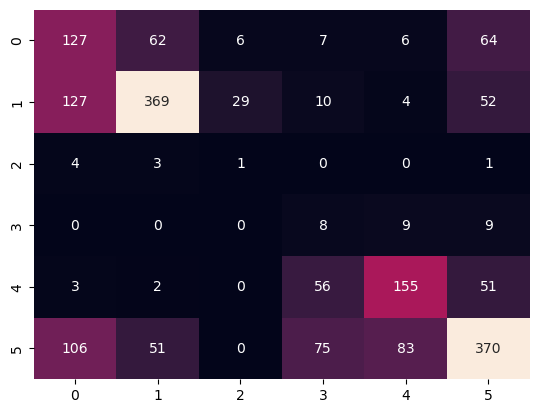

In [29]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T, annot=True, fmt='d', cbar=False)
plt.show();

In [30]:
#model.set_params()



model.fit(X_train, y_train,
          eval_set=[(X_test, y_test)],
          early_stopping_rounds=50,
          eval_metric=['mlogloss'], 
          verbose =100)

[0]	validation_0-mlogloss:1.70433


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-mlogloss:1.13536
[117]	validation_0-mlogloss:1.13779


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [31]:
ypred=model.predict(X_test)

In [32]:
print(classification_report(ypred, y_test,target_names=le.classes_))

              precision    recall  f1-score   support

   High Cost       0.35      0.47      0.40       272
 Higher Cost       0.76      0.62      0.68       591
Highest Cost       0.03      0.11      0.04         9
    Low Cost       0.05      0.31      0.09        26
  Lower Cost       0.60      0.58      0.59       267
 Normal Cost       0.68      0.54      0.60       685

    accuracy                           0.56      1850
   macro avg       0.41      0.44      0.40      1850
weighted avg       0.63      0.56      0.59      1850



[0.00810828 0.01643263 0.02272567 0.00612611 0.0049265  0.32032925
 0.01334543 0.01860586 0.00547349 0.00618792 0.0057942  0.00705305
 0.00474601 0.00455688 0.00621476 0.00670215 0.01443812 0.
 0.0027682  0.00212617 0.00613679 0.         0.00710611 0.00812942
 0.00213987 0.         0.         0.00548    0.00118302 0.
 0.00362489 0.00418298 0.         0.         0.02556071 0.
 0.         0.00924956 0.         0.00524079 0.00568643 0.00350207
 0.00477335 0.00867128 0.00464751 0.00283727 0.         0.00461275
 0.00593164 0.         0.         0.00917021 0.         0.0020291
 0.         0.         0.0033462  0.00357065 0.00668165 0.
 0.         0.00609669 0.00148752 0.00509884 0.00280216 0.
 0.00622342 0.0027157  0.         0.0091223  0.00563257 0.02036884
 0.         0.00153569 0.00739453 0.         0.00846606 0.00433015
 0.00295308 0.         0.00323306 0.00168754 0.         0.
 0.         0.         0.00133882 0.00233712 0.0056028  0.00283482
 0.00338295 0.00359166 0.         0.        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

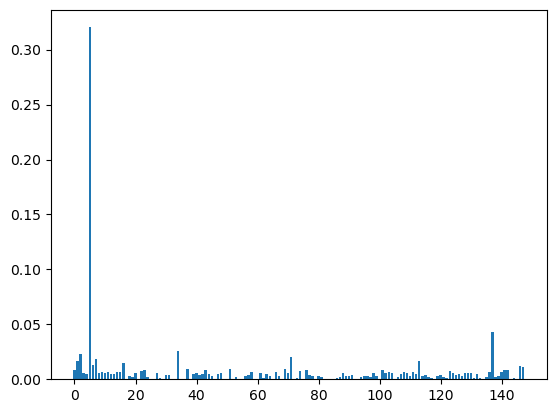

In [33]:
print(model.feature_importances_)
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [36]:
model.get_booster().get_score(importance_type='gain')

{'f0': 1.9368815422058105,
 'f1': 4.253979206085205,
 'f2': 6.286380767822266,
 'f3': 1.6305172443389893,
 'f4': 1.110242486000061,
 'f5': 85.30956268310547,
 'f6': 4.119102954864502,
 'f7': 4.357606887817383,
 'f8': 1.6157276630401611,
 'f9': 1.3034449815750122,
 'f10': 1.4659373760223389,
 'f11': 1.7550177574157715,
 'f12': 0.9740857481956482,
 'f13': 1.0438814163208008,
 'f14': 1.3937687873840332,
 'f15': 1.5915601253509521,
 'f16': 3.772968292236328,
 'f20': 1.770056128501892,
 'f22': 2.121854543685913,
 'f23': 1.7906928062438965,
 'f27': 1.6320961713790894,
 'f30': 1.7437622547149658,
 'f31': 1.1044671535491943,
 'f32': 1.0975483655929565,
 'f34': 7.520989418029785,
 'f36': 1.3514692783355713,
 'f37': 2.4223575592041016,
 'f39': 1.4094606637954712,
 'f40': 1.2692327499389648,
 'f41': 0.991423487663269,
 'f42': 0.9855402112007141,
 'f43': 2.4902231693267822,
 'f44': 2.080101728439331,
 'f47': 1.864283561706543,
 'f48': 1.451673150062561,
 'f51': 3.3055381774902344,
 'f56': 1.327137

In [37]:
X.shape

(18506, 148)

<IPython.core.display.Javascript object>

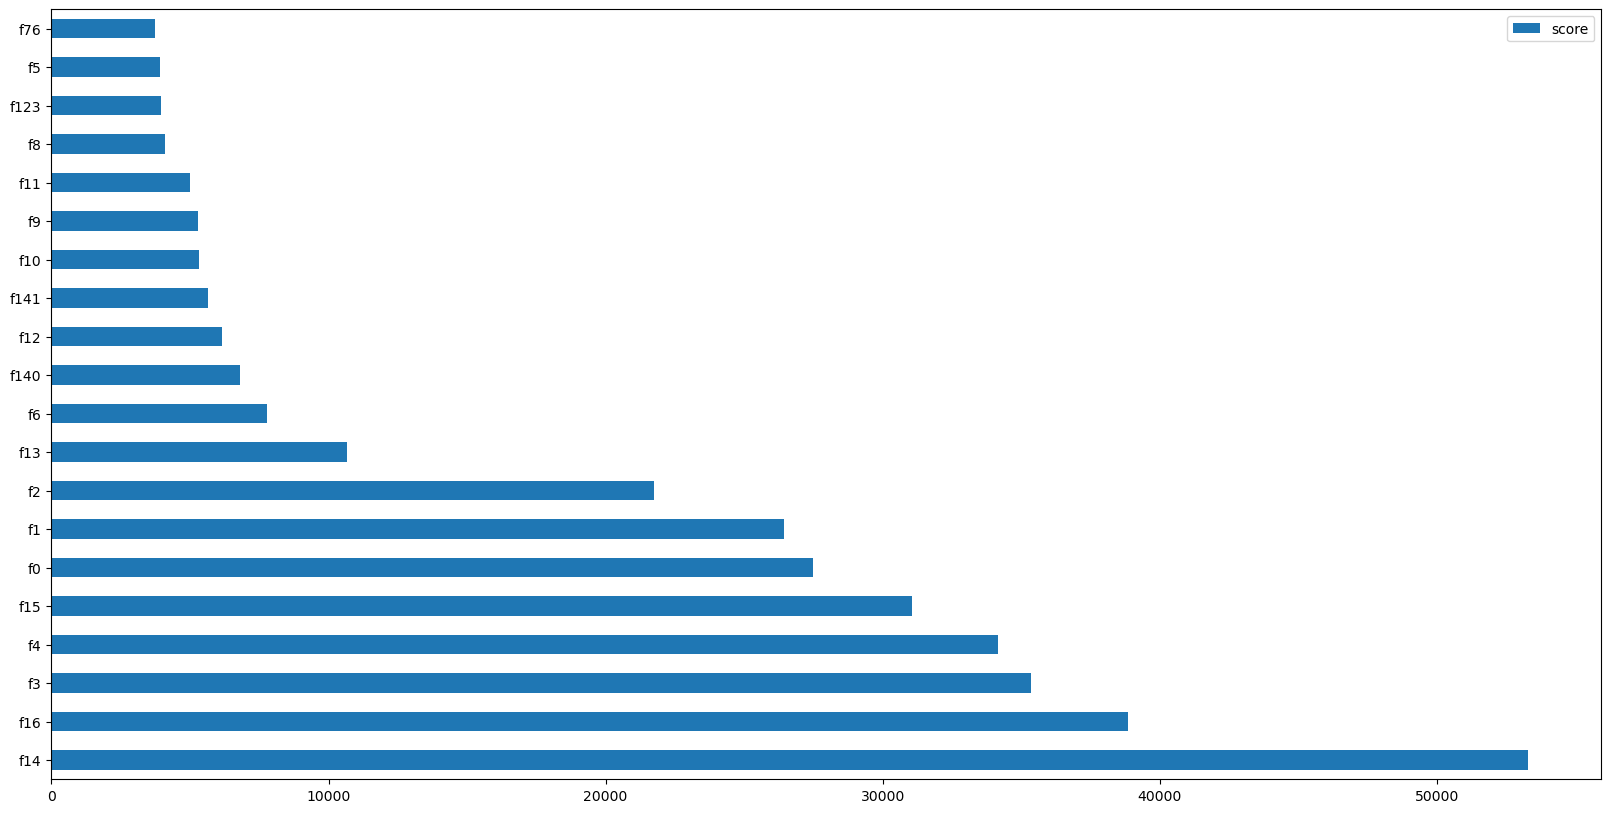

In [38]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.nlargest(20, columns="score").plot(kind='barh', figsize = (20,10)); ## plot top 40 features

<IPython.core.display.Javascript object>

    feature  importance
14     f14     53262.0
16     f16     38832.0
3       f3     35349.0
4       f4     34165.0
15     f15     31049.0
..     ...         ...
23     f32        14.0
32     f44        12.0
29     f41         9.0
76    f122         3.0
48     f78         2.0

[94 rows x 2 columns]


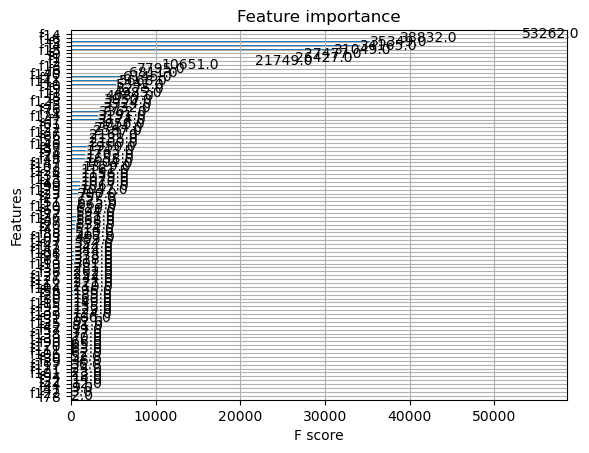

In [39]:
xgb_fea_imp=pd.DataFrame(list(model.get_booster().get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
print('',xgb_fea_imp)
xgb_fea_imp.to_csv('xgb_fea_imp.csv')

from xgboost import plot_importance
plot_importance(model);

In [36]:
train.columns

Index(['country', 'age_group', 'travel_with', 'purpose', 'main_activity',
       'info_source', 'tour_arrangement', 'package_transport_int',
       'package_accomodation', 'package_food', 'package_transport_tz',
       'package_sightseeing', 'package_guided_tour', 'package_insurance',
       'night_mainland', 'night_zanzibar', 'first_trip_tz', 'cost_category',
       'total_nights', 'total_people'],
      dtype='object')

In [56]:
train.travel_with.value_counts()

Alone                           7590
With Spouse                     4842
With Other Friends/Relatives    3268
With Spouse and Children        1193
With Children                    538
Name: travel_with, dtype: int64

In [53]:
train.age_group.value_counts()

25-44           9047
45-64           5648
18-24           2222
65 and Above    1467
Below 18         122
Name: age_group, dtype: int64

In [52]:
train['age_group']=train['age_group'].replace({'<18':'Below 18', '65+' : '65 and Above'})

In [54]:
train.shape

(18506, 24)

In [61]:
for col in train.select_dtypes('object').columns:
    print(col, ':', len(train[col].unique()))

country : 131
age_group : 5
travel_with : 6
purpose : 8
main_activity : 9
info_source : 8
tour_arrangement : 2
package_transport_int : 2
package_accomodation : 2
package_food : 2
package_transport_tz : 2
package_sightseeing : 2
package_guided_tour : 2
package_insurance : 2
first_trip_tz : 2
cost_category : 6
trip_length : 5
group_size : 5


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18506 entries, tour_id1hffseyw to tour_idceoq9por
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                18506 non-null  object 
 1   age_group              18506 non-null  object 
 2   travel_with            17431 non-null  object 
 3   total_female           18504 non-null  float64
 4   total_male             18500 non-null  float64
 5   purpose                18506 non-null  object 
 6   main_activity          18506 non-null  object 
 7   info_source            18506 non-null  object 
 8   tour_arrangement       18506 non-null  object 
 9   package_transport_int  18506 non-null  object 
 10  package_accomodation   18506 non-null  object 
 11  package_food           18506 non-null  object 
 12  package_transport_tz   18506 non-null  object 
 13  package_sightseeing    18506 non-null  object 
 14  package_guided_tour    18506 non-nu